In [1]:
import os
os.chdir("..")

import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [2]:
trial = "keySize_linear_1_10_suite_1_var"
df, spec = dataset.load(bucket="perfd", 
                  app_name="memcached",
                  trial=trial)
with pd.option_context('display.max_rows', None, 'display.max_columns',None):
    display(df.sort_values("keySize"))

,level_0,index,numServerInstance,numClientInstance,serverInstanceType,clientInstanceType,keySize,valueSize,serverThread,clientThread,runTime,waitTime,warmupTime,debug,avg_lat_read,std_lat_read,min_lat_read,99th_lat_read,rx_goodput,tx_goodput,avg_client_server_lat,tenancy
0,0,0,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,63.9,13.4,54.8,73.1,0.0,0.2,91.0,default
19,19,19,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,176.8,18.9,156.2,207.1,0.0,0.1,197.0,default
18,18,18,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,68.0,11.4,54.8,81.2,0.0,0.2,118.0,default
17,17,17,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,54.0,10.5,41.1,63.1,0.1,0.2,90.0,default
16,16,16,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,173.5,14.1,156.2,204.4,0.0,0.1,200.0,default
15,15,15,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,63.7,22.6,49.8,75.2,0.0,0.2,106.0,default
13,13,13,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,66.0,10.6,54.8,79.0,0.0,0.2,96.0,default
12,12,12,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,158.3,27.7,142.0,208.4,0.0,0.1,194.0,default
11,11,11,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,63.7,11.5,49.8,77.5,0.0,0.2,98.0,default
10,10,10,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,160.1,11.1,142.0,188.5,0.0,0.1,223.0,default


hyptertune: start tuning..
(99, 2) (99,)
Search took 1.05 seconds parameter settings.
Model with rank: 1
Mean validation score: -0.408 (std: 0.014)
Parameters: {'fit_intercept': False, 'normalize': True}

[('linear_regression', {'fit_intercept': False, 'normalize': True})]
hyptertune: took 1 s
hyptertune: start tuning..
(99, 2) (99,)
Search took 1.35 seconds parameter settings.
Model with rank: 1
Mean validation score: -0.417 (std: 0.058)
Parameters: {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}

[('nearest_neighbors', {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'})]
hyptertune: took 1 s
hyptertune: start tuning..
(99, 2) (99,)
Search took 5.98 seconds parameter settings.
Model with rank: 1
Mean validation score: -0.380 (std: 0.028)
Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

[('random_forest', {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', '

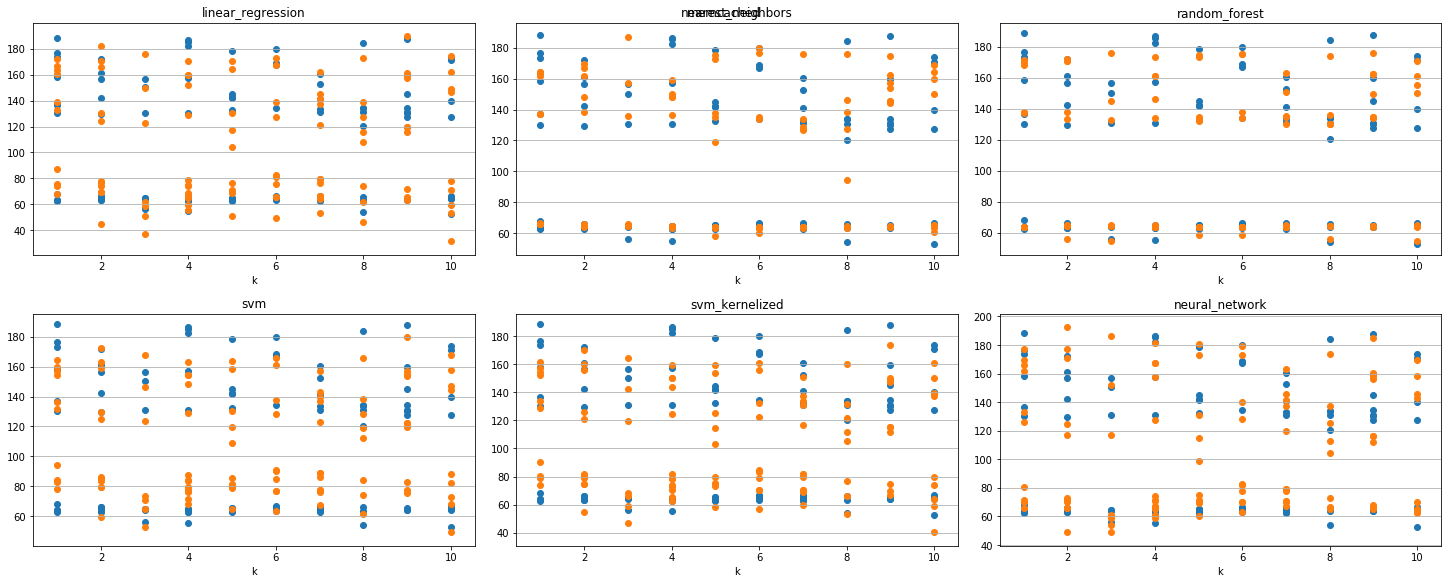

In [3]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["keySize", "avg_client_server_lat"]
ctx["target_feature"] = "avg_lat_read"
ctx["testset_ratio"] = 0.5
ctx["reload"] = True
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"memcached": df})

hyptertune: start tuning..
(99, 2) (99,)
Search took 1.34 seconds parameter settings.
Model with rank: 1
Mean validation score: -0.418 (std: 0.016)
Parameters: {'fit_intercept': False, 'normalize': True}

[('linear_regression', {'fit_intercept': False, 'normalize': True})]
hyptertune: took 1 s
hyptertune: start tuning..
(99, 2) (99,)
Search took 1.36 seconds parameter settings.
Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

[('nearest_neighbors', {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'})]
hyptertune: took 1 s
hyptertune: start tuning..
(99, 2) (99,)
Search took 5.79 seconds parameter settings.
Model with rank: 1
Mean validation score: -0.000 (std: 0.000)
Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 10}

[('random_forest', {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 

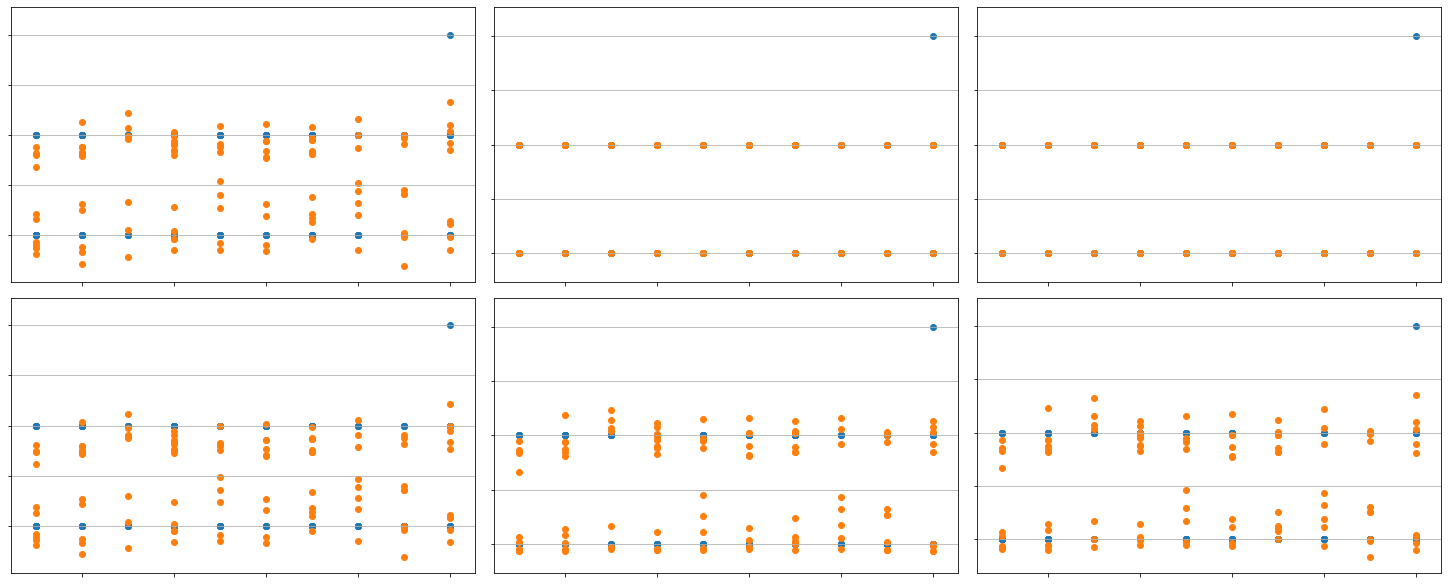

In [5]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["keySize", "avg_client_server_lat"]
ctx["target_feature"] = "tx_goodput"
ctx["testset_ratio"] = 0.5
ctx["reload"] = True
ctx["retune"] = False
# TODO: no tune
results = dataset_tool.best_case_eval(ctx, {"memcached": df})